LAB1 GSN2: Simple autoencoder and conv autoencoder

Michał Rybak 239574


1. Simple autoencoder

In [ ]:
import keras
import tensorflow as tf
from keras import layers
import numpy as np

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(10,activation='relu')(input)
decoded = layers.Dense(784,activation='sigmoid')(encoded)

autoencoder = keras.Model(input,decoded)

In [ ]:
autoencoder.compile(optimizer='adam',loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 3s 4ms/step - loss: 0.0741 - val_loss: 0.0460
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0392 - val_loss: 0.0341
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0317 - val_loss: 0.0298
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0283 - val_loss: 0.0271
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0261 - val_loss: 0.0254
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0247 - val_loss: 0.0242
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0237 - val_loss: 0.0233
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0226 - val_loss: 0.0224
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0222 - val_loss: 0.0221

In [ ]:
print(x_train[0].shape)

(784,)


In [ ]:
result = autoencoder.predict(x_test[0].reshape(-1,784))

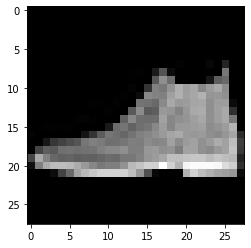

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(28,28),cmap='gray')

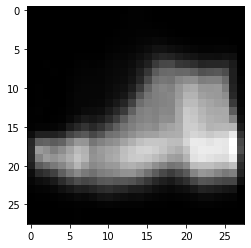

In [ ]:
plt.imshow(result.reshape(28,28),cmap='gray')

2. Conv autoencoder


In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((4, 4), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)



In [ ]:
encoded.shape

TensorShape([None, 4, 4, 32])

In [ ]:
x = layers.Conv2DTranspose(32,(3,3), activation='relu', padding='valid')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32,(3,3), activation='relu', padding='valid')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
decoded.shape

TensorShape([None, 28, 28, 1])

In [ ]:
autoencoder = keras.Model(input_img,decoded)

In [ ]:
autoencoder.compile(optimizer='adam',loss='mse')

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 13s 12ms/step - loss: 0.0416 - val_loss: 0.0238
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0218 - val_loss: 0.0202
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0191 - val_loss: 0.0181
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0175 - val_loss: 0.0169
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0163 - val_loss: 0.0159
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0149 - val_loss: 0.0146
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0134 - val_l

In [ ]:
result = autoencoder.predict(x_test[10].reshape(1,28, 28, 1))

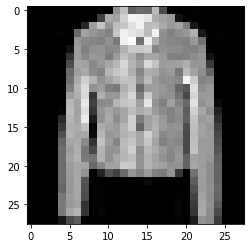

In [ ]:
plt.imshow(x_test[10].reshape(28,28),cmap='gray')

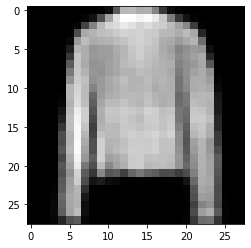

In [ ]:
plt.imshow(result.reshape(28,28),cmap='gray')

In [ ]:
jak działa Conv2DTranspose
2. conv testy